In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb



In [40]:
# Load Dataset
file_path = "data/survey.csv"
data = pd.read_csv(file_path)

In [42]:
data.head()  

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [44]:
data.info()  # Show dataset summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

<Axes: xlabel='Country'>

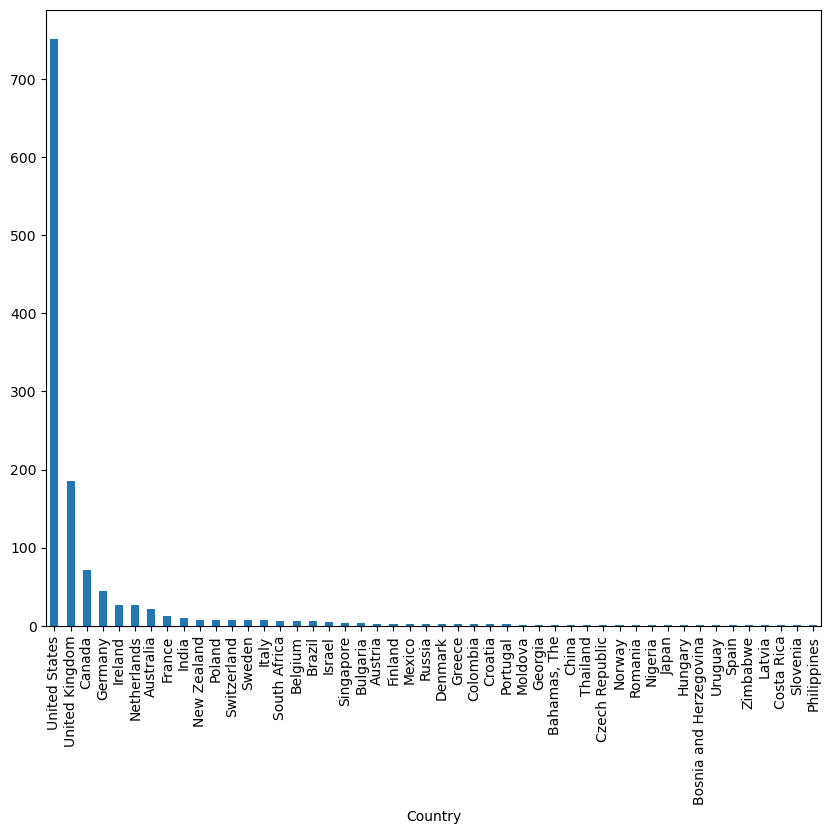

In [46]:
# Visualize country-wise distribution before dropping 'Country' column
data['Country'].value_counts().plot(kind='bar', figsize=(10, 8))

In [48]:
# Remove unnecessary columns
data.drop(['Country', 'state', 'Timestamp', 'comments'], axis=1, inplace=True)

In [50]:
# Check missing values
data.isnull().sum()

Age                            0
Gender                         0
self_employed                 18
family_history                 0
treatment                      0
work_interfere               264
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

In [52]:
# Handle missing values in 'self_employed' and 'work_interfere'
data['self_employed'] = data['self_employed'].fillna('No')
data['work_interfere'] = data['work_interfere'].fillna('No')

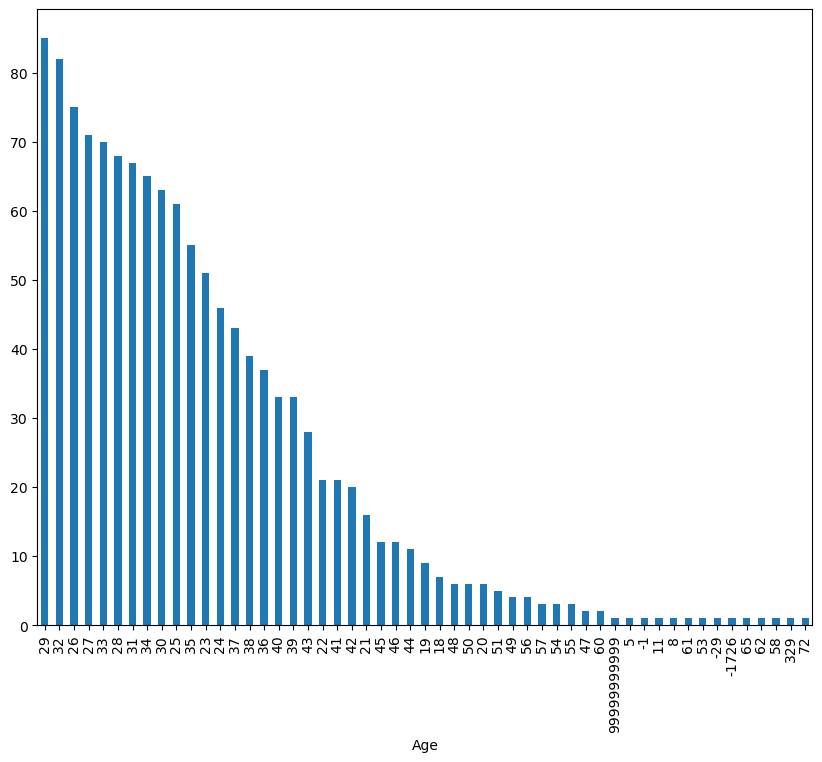

In [54]:
# Remove outliers in 'Age' column
data['Age'].value_counts().plot(kind='bar', figsize=(10, 8))
data.drop(data[(data['Age'] > 60) | (data['Age'] < 18)].index, inplace=True)

In [56]:
# Standardize gender labels
data['Gender'] = data['Gender'].replace(['Male', 'male', 'M', 'm', 'Male', 'Cis Male',
                                         'Man', 'cis male', 'Male-ish', 'Male (CIS)',
                                         'Cis Man', 'msle', 'Mair', 'Mal', 'maile', 'Make'], 'Male')

data['Gender'] = data['Gender'].replace(['Female ', 'female', 'F', 'f', 'Woman', 'femail', 'Cis Female',
                                         'cis-female/femmeFemale', 'Femake', 'Female (cis)', 'woman'], 'Female')

data['Gender'] = data['Gender'].replace(['Female (trans)', 'queer/she/they', 'non-binary', 'fluid', 'queer', 'Androgyne',
                                         'Trans-female', 'male learnig androgynous', 'Agender', 'A little about you', 'Nah',
                                         'All', 'ostensibly male', 'unsure what that really means', 'Genderqueer', 'Enby', 'p',
                                         'Neuter', 'something kinda male?', 'Guy (-ish) ^_^', 'Trans woman'], 'Non-Binary')



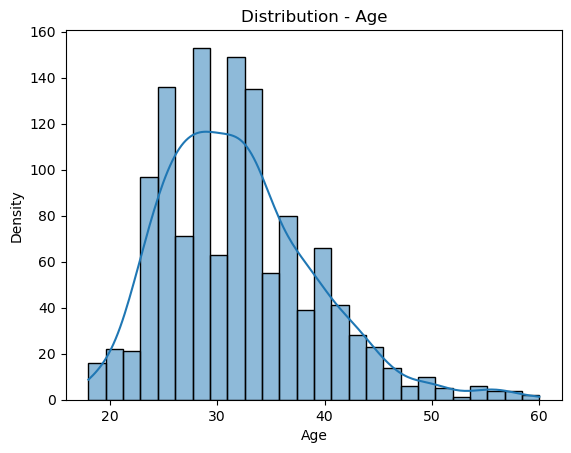

In [58]:
# Visualize Age distribution
sb.histplot(data["Age"], kde=True)
plt.title("Distribution - Age")
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()

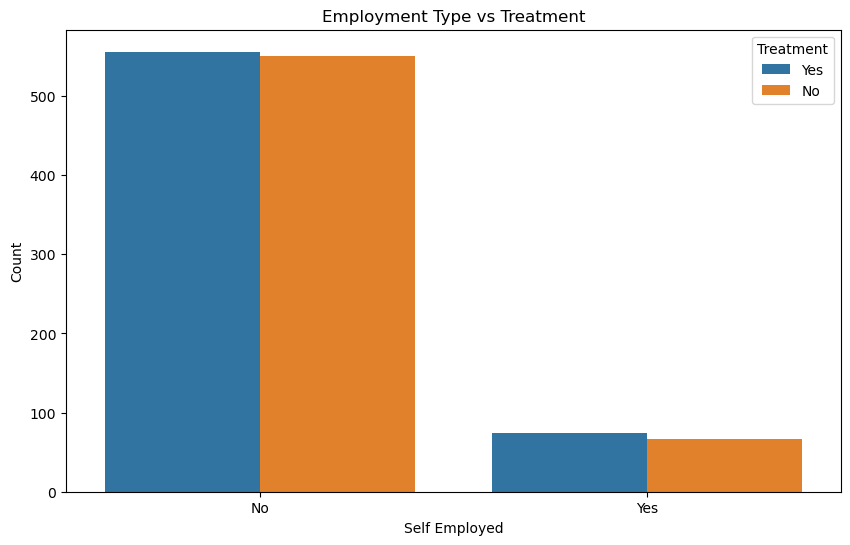

In [60]:
# Compare self-employment status with mental health treatment
plt.figure(figsize=(10, 6))
sb.countplot(x=data['self_employed'], hue=data['treatment'])
plt.title('Employment Type vs Treatment')
plt.xlabel('Self Employed')
plt.ylabel('Count')
plt.legend(title='Treatment', loc='upper right')
plt.show()

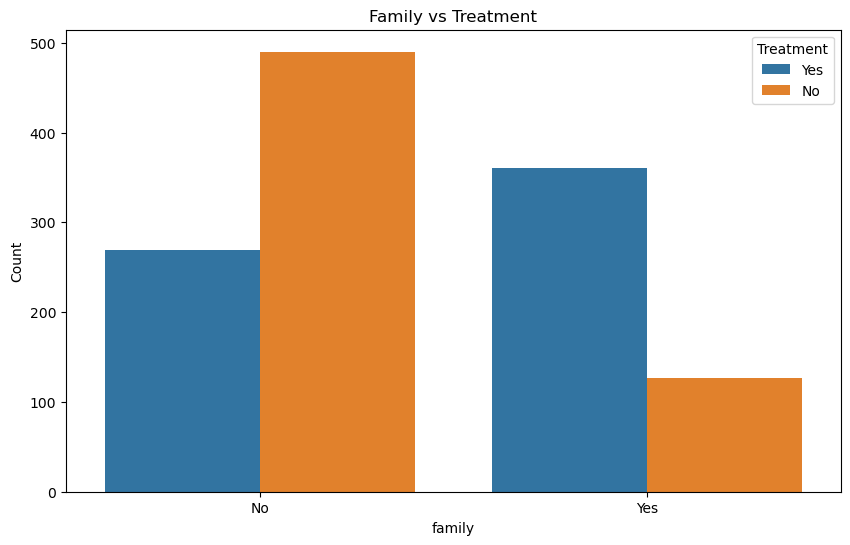

In [92]:
# Compare family history with mental health treatment
plt.figure(figsize=(10, 6))
sb.countplot(x=data['family_history'], hue=data['treatment'])
plt.title('Family vs Treatment')
plt.xlabel('family')
plt.ylabel('Count')
plt.legend(title='Treatment', loc='upper right')
plt.show()

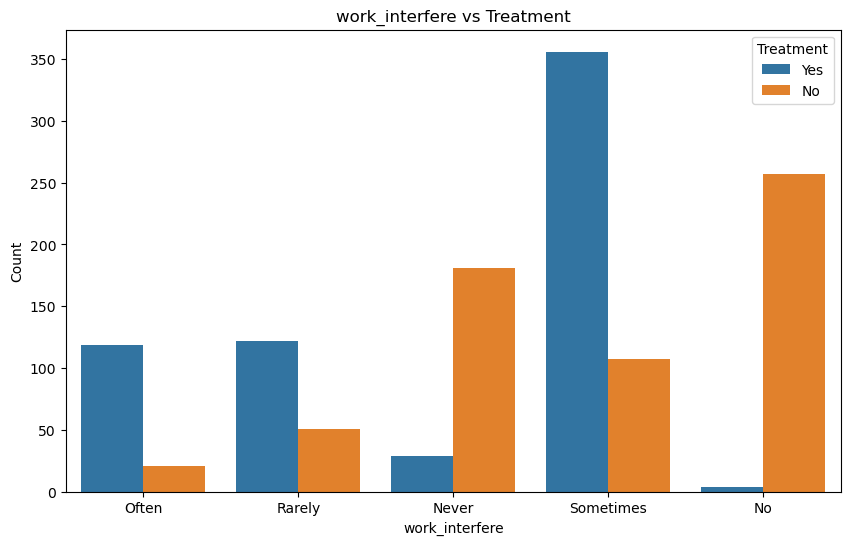

In [94]:
# Compare work interfere with mental health treatment
plt.figure(figsize=(10, 6))
sb.countplot(x=data['work_interfere'], hue=data['treatment'])
plt.title('work_interfere vs Treatment')
plt.xlabel('work_interfere')
plt.ylabel('Count')
plt.legend(title='Treatment', loc='upper right')
plt.show()

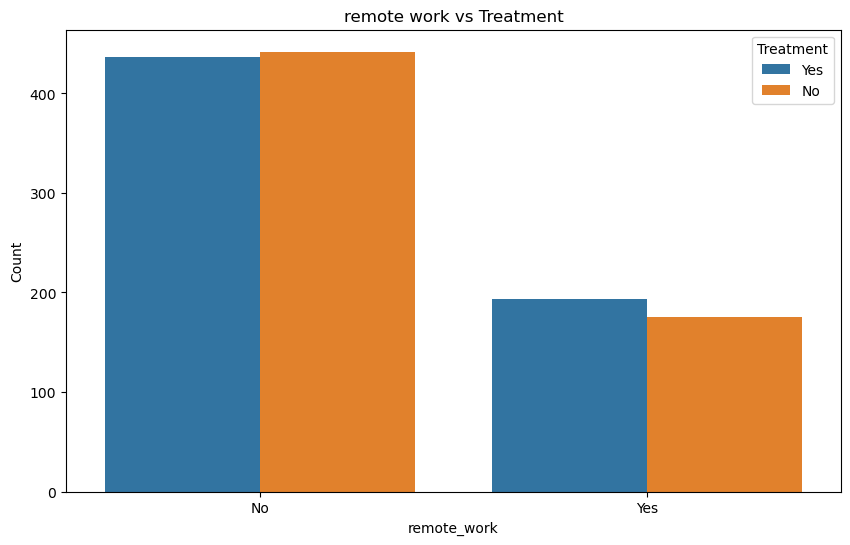

In [96]:
# Compare remote work with mental health treatment
plt.figure(figsize=(10, 6))
sb.countplot(x=data['remote_work'], hue=data['treatment'])
plt.title('remote work vs Treatment')
plt.xlabel('remote_work')
plt.ylabel('Count')
plt.legend(title='Treatment', loc='upper right')
plt.show()

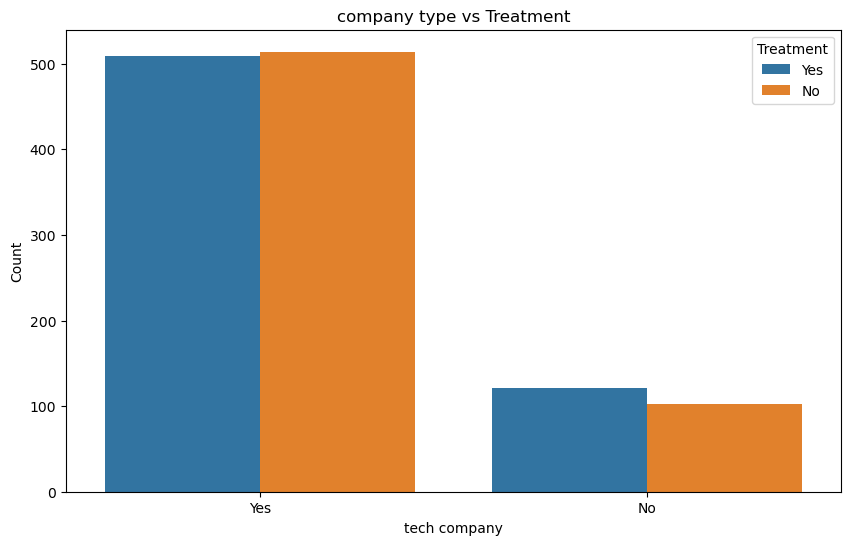

In [98]:
# Compare company type with mental health treatment
plt.figure(figsize=(10, 6))
sb.countplot(x=data['tech_company'], hue=data['treatment'])
plt.title('company type vs Treatment')
plt.xlabel('tech company')
plt.ylabel('Count')
plt.legend(title='Treatment', loc='upper right')
plt.show()

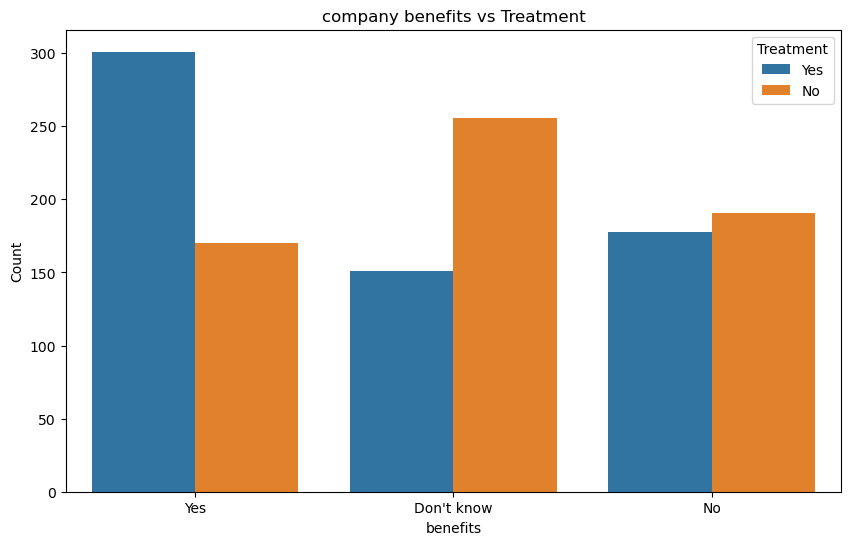

In [100]:
# Compare company benefits with mental health treatment
plt.figure(figsize=(10, 6))
sb.countplot(x=data['benefits'], hue=data['treatment'])
plt.title('company benefits vs Treatment')
plt.xlabel('benefits')
plt.ylabel('Count')
plt.legend(title='Treatment', loc='upper right')
plt.show()

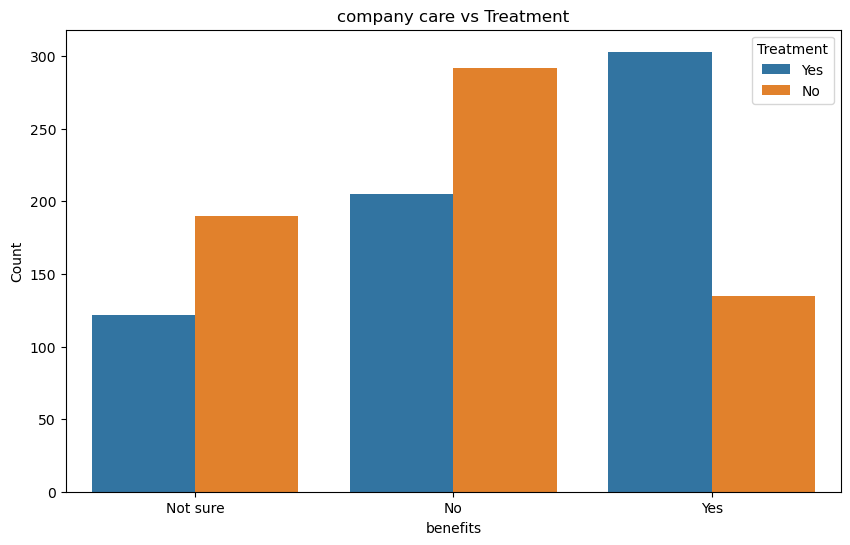

In [102]:
# Compare company care options with mental health treatment
plt.figure(figsize=(10, 6))
sb.countplot(x=data['care_options'], hue=data['treatment'])
plt.title('company care vs Treatment')
plt.xlabel('benefits')
plt.ylabel('Count')
plt.legend(title='Treatment', loc='upper right')
plt.show()

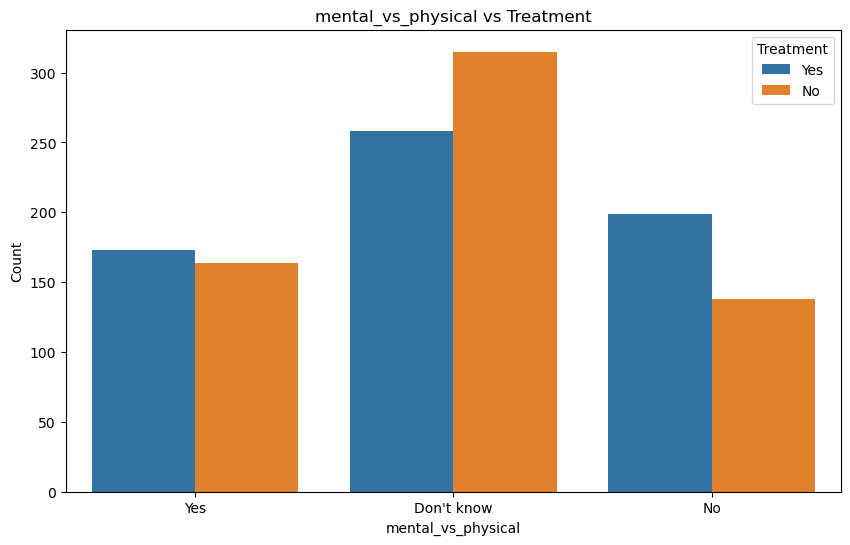

In [110]:
# Compare mental vs physical options with mental health treatment
plt.figure(figsize=(10, 6))
sb.countplot(x=data['mental_vs_physical'], hue=data['treatment'])
plt.title('mental_vs_physical vs Treatment')
plt.xlabel('mental_vs_physical')
plt.ylabel('Count')
plt.legend(title='Treatment', loc='upper right')
plt.show()

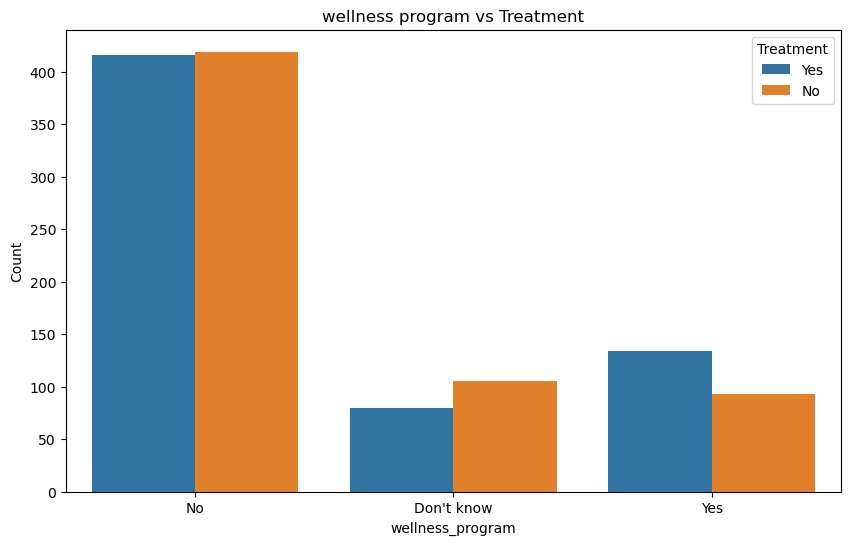

In [112]:
# Compare wellness program options with mental health treatment
plt.figure(figsize=(10, 6))
sb.countplot(x=data['wellness_program'], hue=data['treatment'])
plt.title('wellness program vs Treatment')
plt.xlabel('wellness_program')
plt.ylabel('Count')
plt.legend(title='Treatment', loc='upper right')
plt.show()

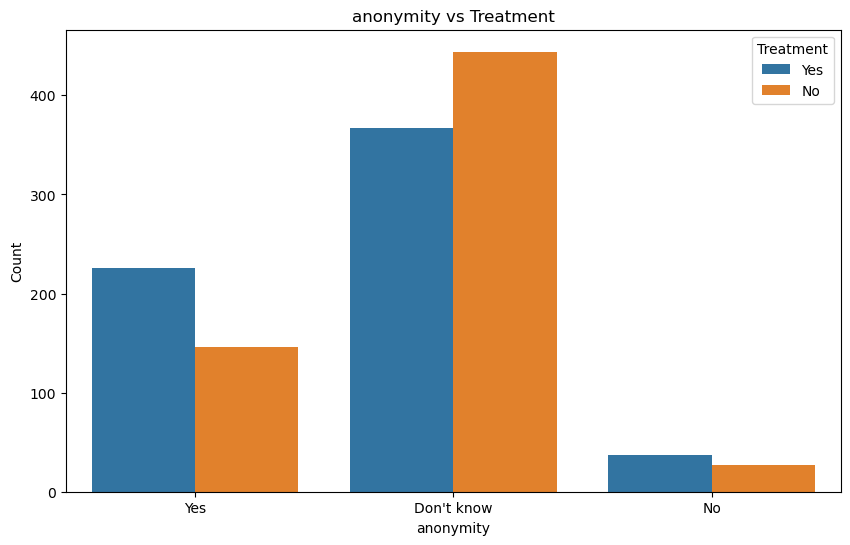

In [114]:
# Compare anonymity options with mental health treatment
plt.figure(figsize=(10, 6))
sb.countplot(x=data['anonymity'], hue=data['treatment'])
plt.title('anonymity vs Treatment')
plt.xlabel('anonymity')
plt.ylabel('Count')
plt.legend(title='Treatment', loc='upper right')
plt.show()

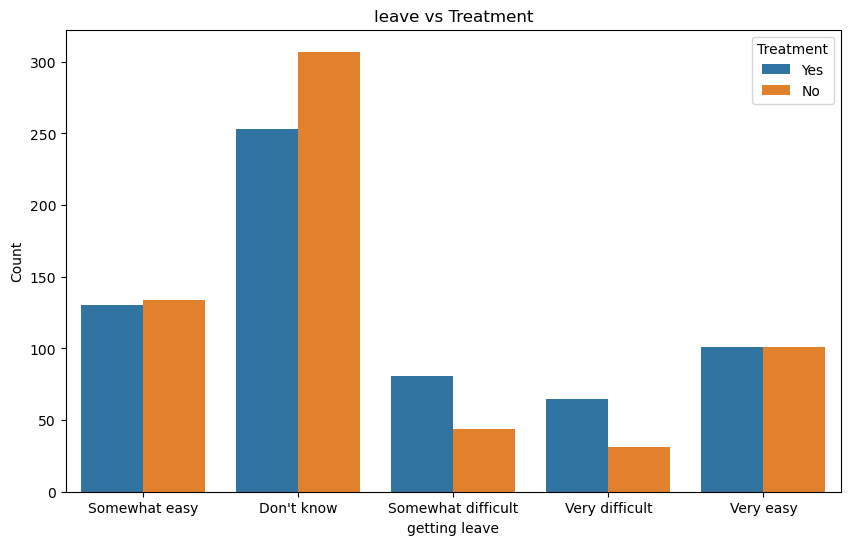

In [118]:
# Compare leave options with mental health treatment
plt.figure(figsize=(10, 6))
sb.countplot(x=data['leave'], hue=data['treatment'])
plt.title('leave vs Treatment')
plt.xlabel('getting leave')
plt.ylabel('Count')
plt.legend(title='Treatment', loc='upper right')
plt.show()

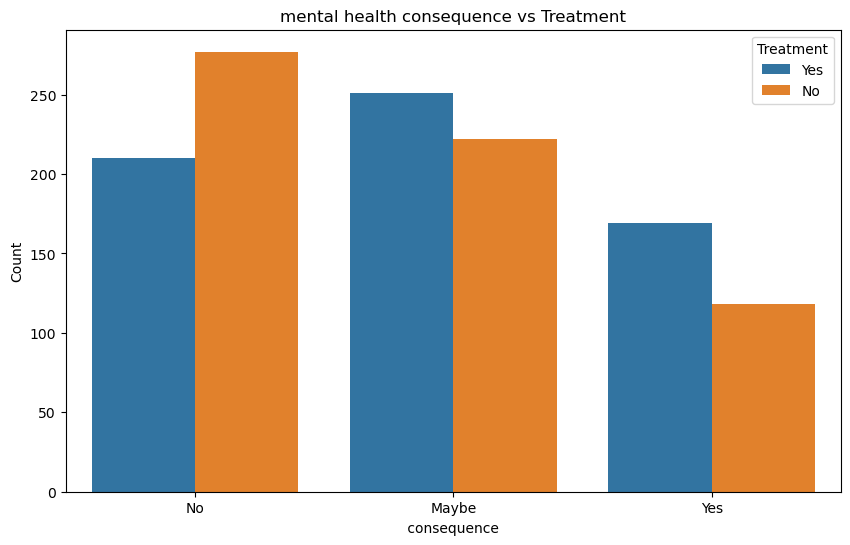

In [120]:
# Compare mental health consequence with mental health treatment
plt.figure(figsize=(10, 6))
sb.countplot(x=data['mental_health_consequence'], hue=data['treatment'])
plt.title('mental health consequence vs Treatment')
plt.xlabel(' consequence ')
plt.ylabel('Count')
plt.legend(title='Treatment', loc='upper right')
plt.show()

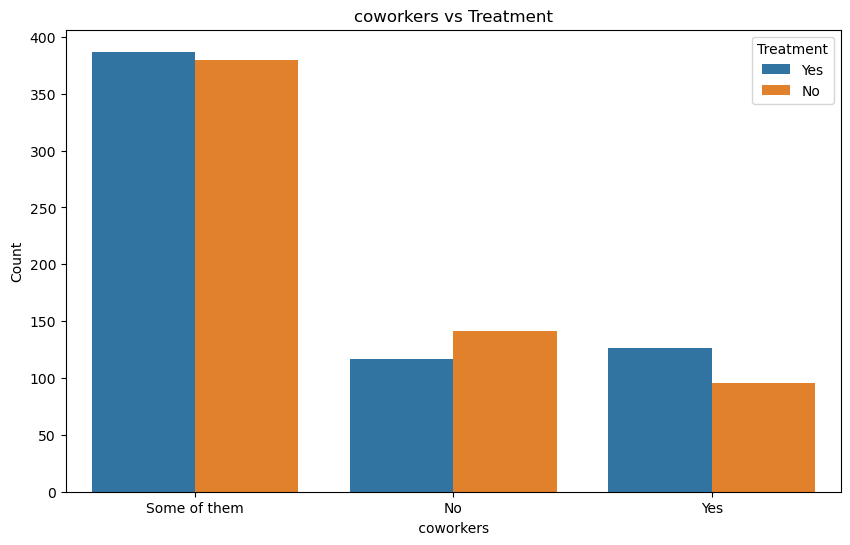

In [126]:
# Compare coworkers with mental health treatment
plt.figure(figsize=(10, 6))
sb.countplot(x=data['coworkers'], hue=data['treatment'])
plt.title('coworkers vs Treatment')
plt.xlabel(' coworkers ')
plt.ylabel('Count')
plt.legend(title='Treatment', loc='upper right')
plt.show()

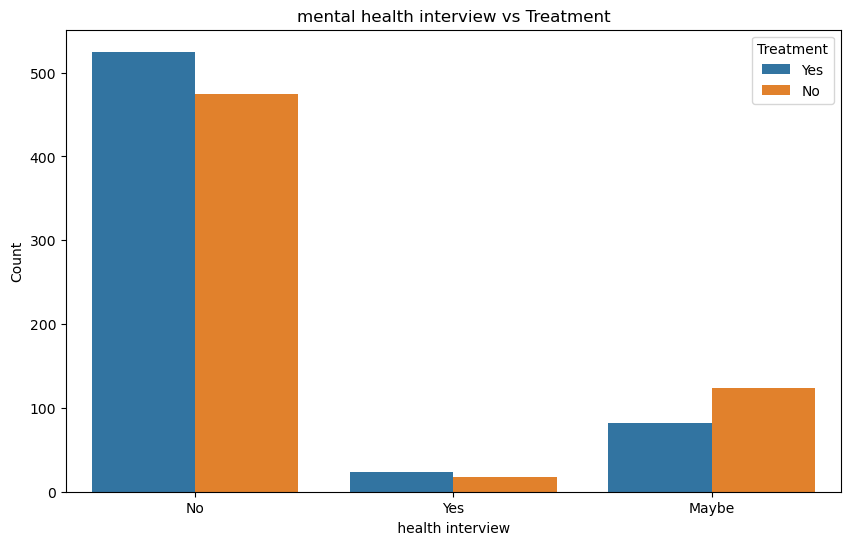

In [128]:
# Compare mental health interview with mental health treatment
plt.figure(figsize=(10, 6))
sb.countplot(x=data['mental_health_interview'], hue=data['treatment'])
plt.title('mental health interview vs Treatment')
plt.xlabel(' health interview ')
plt.ylabel('Count')
plt.legend(title='Treatment', loc='upper right')
plt.show()

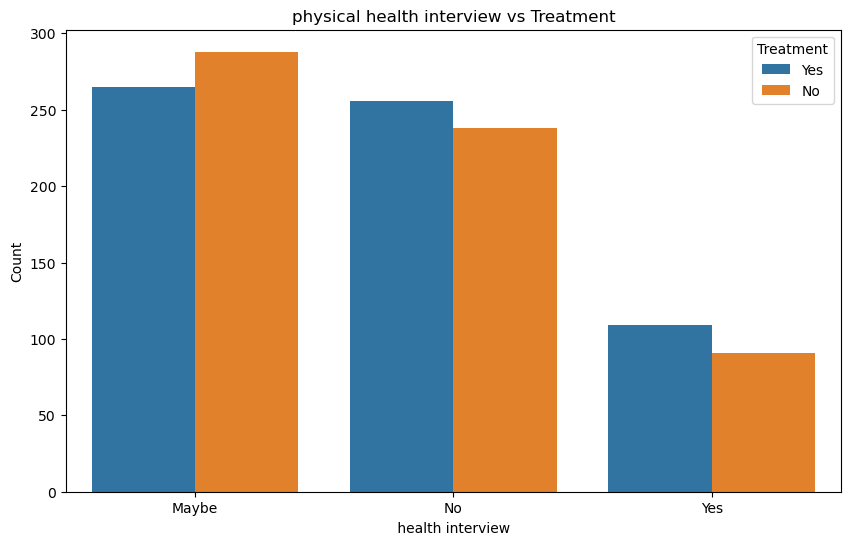

In [130]:
# Compare physical health interview with mental health treatment
plt.figure(figsize=(10, 6))
sb.countplot(x=data['phys_health_interview'], hue=data['treatment'])
plt.title('physical health interview vs Treatment')
plt.xlabel(' health interview ')
plt.ylabel('Count')
plt.legend(title='Treatment', loc='upper right')
plt.show()

In [64]:
# Encode target variable
y = LabelEncoder().fit_transform(data['treatment'])

In [66]:
# Save encoder for future use
import joblib
joblib.dump(ct, 'feature_values')

['feature_values']

In [68]:
# Split dataset for training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=49)

In [70]:
# Initialize classification models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

model_dict = {
    'Logistic Regression': LogisticRegression(solver='liblinear', random_state=49),
    'Random Forest Classifier': RandomForestClassifier(random_state=49),
    'Decision Tree Classifier': DecisionTreeClassifier(random_state=49)
}



In [72]:
# Function to train and evaluate models
from sklearn.metrics import accuracy_score

def model_test(X_train, X_test, y_train, y_test, model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'---------- {model_name} ---------')
    print(f'Score is : {accuracy}\n')



In [74]:
# Train models
for model_name, model in model_dict.items():
    model_test(X_train, X_test, y_train, y_test, model, model_name)



---------- Logistic Regression ---------
Score is : 0.856

---------- Random Forest Classifier ---------
Score is : 0.84

---------- Decision Tree Classifier ---------
Score is : 0.776



In [84]:
# Train Logistic Regression and Random Forest with tuning
lr = LogisticRegression(random_state=99)
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)

rf_tuned = RandomForestClassifier(random_state=49, n_estimators=11)
rf_tuned.fit(X_train, y_train)
pred_rf_tuned = rf_tuned.predict(X_test)



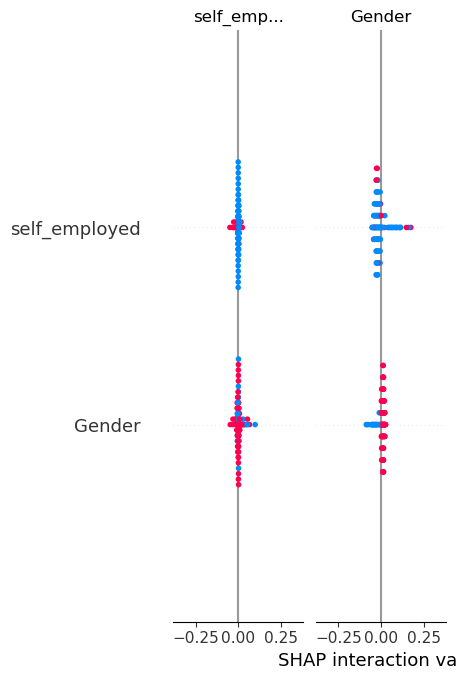

In [82]:
import shap

# Convert X_test back to DataFrame if needed
X_test_df = pd.DataFrame(X_test, columns=categorical_columns + ["Age"])  # Adjust column names accordingly

# Create SHAP explainer for Random Forest
explainer = shap.TreeExplainer(rf_tuned)
shap_values = explainer.shap_values(X_test_df)

# Visualize feature importance
shap.summary_plot(shap_values, X_test_df, feature_names=X_test_df.columns)


In [86]:
from sklearn.metrics import classification_report, roc_auc_score

# Evaluate models
print("Logistic Regression Metrics:")
print(classification_report(y_test, pred_lr))
print("ROC-AUC Score:", roc_auc_score(y_test, pred_lr))

print("\nRandom Forest Classifier Metrics:")
print(classification_report(y_test, pred_rf_tuned))
print("ROC-AUC Score:", roc_auc_score(y_test, pred_rf_tuned))




Logistic Regression Metrics:
              precision    recall  f1-score   support

           0       0.82      0.83      0.83        54
           1       0.87      0.86      0.87        71

    accuracy                           0.85       125
   macro avg       0.84      0.85      0.85       125
weighted avg       0.85      0.85      0.85       125

ROC-AUC Score: 0.846244131455399

Random Forest Classifier Metrics:
              precision    recall  f1-score   support

           0       0.83      0.80      0.81        54
           1       0.85      0.87      0.86        71

    accuracy                           0.84       125
   macro avg       0.84      0.83      0.84       125
weighted avg       0.84      0.84      0.84       125

ROC-AUC Score: 0.8347678664580073


In [132]:
import pickle

# Save model
with open('mental_health_model.pkl', 'wb') as file:
    pickle.dump(rf_tuned, file)

# Save ColumnTransformer
import joblib
joblib.dump(ct, 'feature_values.pkl')


['feature_values.pkl']